# Brain Tumor Classification

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
# Import data managing libraries
import numpy as np
import pandas as pd

# Import Tensorflow
import tensorflow as tf
import tensorflow.keras as keras

# Plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import random
# Set the seed for repeatability
seed = 42

# Set random seed for NumPy
np.random.seed(42)

# Set random seed for TensorFlow
tf.random.set_seed(42)

# Set random seed for Python's built-in random module
random.seed(42)

In [3]:
from functions import process_data
import os

# Define data folder
data_folder = "data/"

# Define train, val, test folders
train_folder = os.path.join(data_folder, "Training/")
test_folder = os.path.join(data_folder, "Testing/")
val_folder = os.path.join(data_folder, "Validation/")

# Define our data directories
train_data_dir = train_folder
test_data_dir = test_folder
val_data_dir = val_folder

train_gen, test_gen, val_gen = process_data(128, 32, train_data_dir, test_data_dir, val_data_dir)

Found 6946 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.
Found 1734 images belonging to 4 classes.


In [4]:
# Find out how the image data generators labeled our classes
train_class_labels = train_gen.class_indices
val_class_labels = train_gen.class_indices
test_class_labels = val_gen.class_indices

# Print the class labels
print("Train Class Labels:", train_class_labels)
print("Validation Class Labels:", val_class_labels)
print("Test Class Labels:", test_class_labels)

Train Class Labels: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}
Validation Class Labels: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}
Test Class Labels: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}


In [5]:
# Retrieve one batch of data from the generator
data_batch, label_batch = next(train_gen)

# Print the shape of the data batch and label batch
print("Data batch shape:", data_batch.shape)
print("Label batch shape:", label_batch.shape)

Data batch shape: (32, 128, 128, 3)
Label batch shape: (32, 4)


Image dimensions: (128, 128, 3)


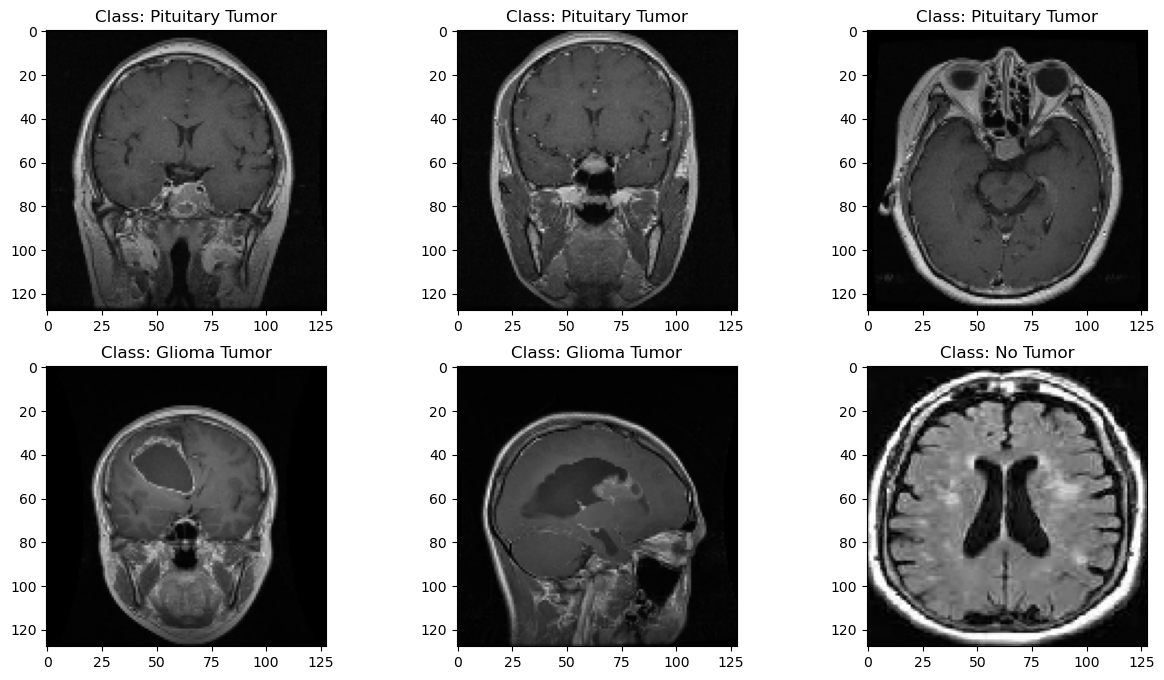

In [6]:
import matplotlib.pyplot as plt

# Retrieve one batch of images from the generator
images, labels = train_gen.next()

# Print the dimensions of the first image
print("Image dimensions:", images[0].shape)

# Define the class labels
class_labels = {'Glioma Tumor': 0, 'Meningioma Tumor': 1, 'No Tumor': 2, 'Pituitary Tumor': 3}

# Display the first six images with their labels
fig, ax = plt.subplots(2, 3, facecolor='white', figsize=(15, 8))

for i in range(2):
    for j in range(3):
        # Calculate the index in the images and labels arrays
        idx = i * 3 + j
        
        # Get the predicted class
        class_idx = np.argmax(labels[idx])
        
        # Get the class name from the label
        class_name = [key for key, value in class_labels.items() if value == class_idx][0]
        
        # Plot the image
        ax[i, j].imshow(images[idx])
        ax[i, j].set_title(f"Class: {class_name}")

plt.show()

# Convolutinal Base

In [7]:
from tensorflow.keras.metrics import Precision, Recall

# Define metrics we want to log for the compile method callback
metrics = [
        Precision(name='precision'),
        Recall(name='recall'),
        'accuracy'
    ]

# Define dictionary to store history
conv = {}

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Define input shape
input_shape = (128, 128, 3)

# Define the basic model 
cnn = Sequential()

# Define the layers 
# Flatten layer to reshape the output
cnn.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', input_shape=input_shape))
cnn.add(MaxPool2D(pool_size=(2,2)))

# Flatten Tensor
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))

# Define the output 
cnn.add(Dense(4, activation='softmax'))

cnn.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=metrics)
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 128)               8388736   
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 8,389,700
Trainable params: 8,389,700
Non-trainable params: 0
______________________________________________

Epoch 1/50
218/218 [==============================] - 11s 39ms/step - loss: 0.6010 - precision: 0.8313 - recall: 0.6918 - accuracy: 0.7694 - val_loss: 0.2404 - val_precision: 0.9249 - val_recall: 0.9025 - val_accuracy: 0.9123 - lr: 0.0010
Epoch 2/50
218/218 [==============================] - 8s 37ms/step - loss: 0.1487 - precision: 0.9508 - recall: 0.9433 - accuracy: 0.9466 - val_loss: 0.1594 - val_precision: 0.9486 - val_recall: 0.9366 - val_accuracy: 0.9441 - lr: 0.0010
Epoch 3/50
218/218 [==============================] - 8s 37ms/step - loss: 0.0508 - precision: 0.9869 - recall: 0.9862 - accuracy: 0.9865 - val_loss: 0.1185 - val_precision: 0.9565 - val_recall: 0.9510 - val_accuracy: 0.9544 - lr: 0.0010
Epoch 4/50
218/218 [==============================] - 8s 38ms/step - loss: 0.0208 - precision: 0.9951 - recall: 0.9950 - accuracy: 0.9951 - val_loss: 0.1275 - val_precision: 0.9537 - val_recall: 0.9504 - val_accuracy: 0.9510 - lr: 0.0010
Epoch 5/50
218/218 [===========================

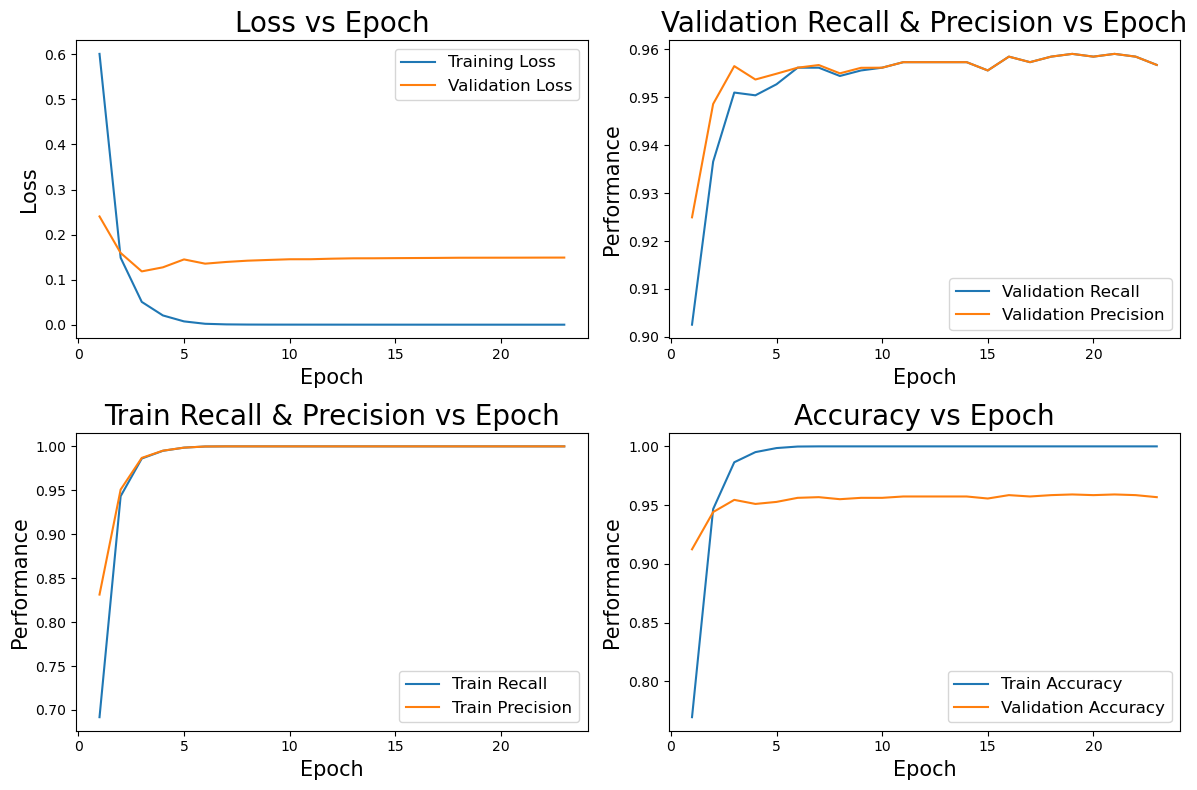

In [9]:
from functions import view_history, train_model, model_evaluate

# Train model
conv['Version1'] = train_model(cnn, train_gen, val_gen, 50)

# View history 
view_history(conv, 'Version1')

In [10]:
# Evalaute model
model_evaluate(cnn, train_gen, test_gen, val_gen)

 2/54 [>.............................] - ETA: 2s - loss: 0.0281 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 2s 29ms/step - loss: 0.1185 - precision: 0.9565 - recall: 0.9510 - accuracy: 0.9544


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.017980,99.856013,99.841636,99.856031
1,Test,0.647720,91.219801,90.791792,91.143698
2,Validation,0.118487,95.649654,95.098037,95.444059


It seems that our validation curve is just underdeveloped. Our train curve seems fine. This might be an indication of a model that is not complex enough to capture the details in the data. Lets make the model more complex

**Next Steps**: Increase model complexity to improve model learning and generalization.

# CNN Version 2

In [11]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Define input shape
input_shape = (128, 128, 3)

# Define the basic model 
cnn2 = Sequential()

# Define the layers 
# Flatten layer to reshape the output
cnn2.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', input_shape=input_shape))
cnn2.add(MaxPool2D(pool_size=(2,2)))
cnn2.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn2.add(MaxPool2D(pool_size=(2,2)))

# Flatten Tensor
cnn2.add(Flatten())
cnn2.add(Dense(128, activation='relu'))
cnn2.add(Dense(128, activation='relu'))

# Define the output 
cnn2.add(Dense(4, activation='softmax'))

cnn2.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=metrics)
print(cnn2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Epoch 1/50
218/218 [==============================] - 9s 38ms/step - loss: 0.6224 - precision: 0.8409 - recall: 0.7271 - accuracy: 0.7498 - val_loss: 0.3719 - val_precision: 0.8723 - val_recall: 0.8466 - val_accuracy: 0.8570 - lr: 0.0010
Epoch 2/50
218/218 [==============================] - 8s 37ms/step - loss: 0.2612 - precision: 0.9091 - recall: 0.8925 - accuracy: 0.9008 - val_loss: 0.2562 - val_precision: 0.9102 - val_recall: 0.8945 - val_accuracy: 0.9025 - lr: 0.0010
Epoch 3/50
218/218 [==============================] - 8s 37ms/step - loss: 0.1379 - precision: 0.9512 - recall: 0.9463 - accuracy: 0.9493 - val_loss: 0.2005 - val_precision: 0.9327 - val_recall: 0.9268 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 4/50
218/218 [==============================] - 8s 37ms/step - loss: 0.0790 - precision: 0.9717 - recall: 0.9693 - accuracy: 0.9706 - val_loss: 0.1406 - val_precision: 0.9544 - val_recall: 0.9533 - val_accuracy: 0.9533 - lr: 0.0010
Epoch 5/50
218/218 [============================

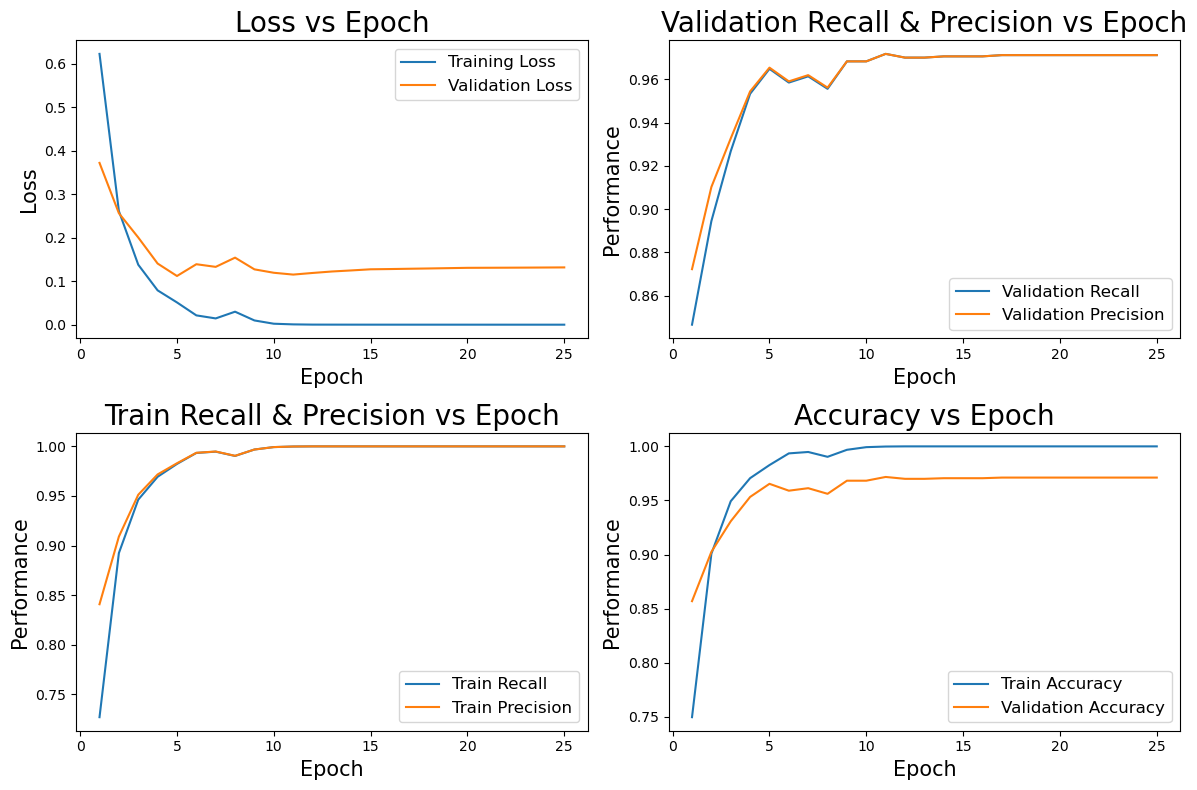

 3/54 [>.............................] - ETA: 1s - loss: 0.0121 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 2s 30ms/step - loss: 0.1120 - precision: 0.9654 - recall: 0.9648 - accuracy: 0.9654


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.019821,99.553633,99.539304,99.539304
1,Test,0.939167,91.138500,91.085047,91.085047
2,Validation,0.111982,96.537799,96.482122,96.539789


In [12]:
from functions import train_model, model_evaluate, view_history

# Train model
conv['Version2'] = train_model(cnn2, train_gen, val_gen, 50)

# View history 
view_history(conv, 'Version2')

# Evalaute model
model_evaluate(cnn2, train_gen, test_gen, val_gen)

Making the model deeper increased the generalization. Lets attempt to keep making it deeper. There is no overfit occuring yet and the model seems to do well on the train set but not the validation set. 

**Next Steps**: Nake the model deeper

# CNN Version 4

In [13]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy

# Define input shape
input_shape = (128, 128, 3)

# Define the basic model 
cnn4 = Sequential()

# Define the layers 
# Flatten layer to reshape the output
cnn4.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', input_shape=input_shape))
cnn4.add(MaxPool2D(pool_size=(2,2)))
cnn4.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn4.add(MaxPool2D(pool_size=(2,2)))
cnn4.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn4.add(MaxPool2D(pool_size=(2,2)))


# Flatten Tensor
cnn4.add(Flatten())
cnn4.add(Dense(128, activation='relu'))
cnn4.add(Dense(128, activation='relu'))
cnn4.add(Dense(128, activation='relu'))

# Define the output 
cnn4.add(Dense(4, activation='softmax'))

cnn4.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=metrics)
print(cnn4.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 16)      

Epoch 1/50
218/218 [==============================] - 9s 38ms/step - loss: 0.6869 - precision: 0.8170 - recall: 0.6869 - accuracy: 0.7021 - val_loss: 0.5078 - val_precision: 0.8279 - val_recall: 0.7907 - val_accuracy: 0.8149 - lr: 0.0010
Epoch 2/50
218/218 [==============================] - 8s 38ms/step - loss: 0.3898 - precision: 0.8591 - recall: 0.8321 - accuracy: 0.8465 - val_loss: 0.3167 - val_precision: 0.8891 - val_recall: 0.8691 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 3/50
218/218 [==============================] - 8s 38ms/step - loss: 0.2416 - precision: 0.9140 - recall: 0.9030 - accuracy: 0.9087 - val_loss: 0.3233 - val_precision: 0.8780 - val_recall: 0.8633 - val_accuracy: 0.8714 - lr: 0.0010
Epoch 4/50
218/218 [==============================] - 8s 37ms/step - loss: 0.1658 - precision: 0.9412 - recall: 0.9364 - accuracy: 0.9387 - val_loss: 0.1579 - val_precision: 0.9444 - val_recall: 0.9400 - val_accuracy: 0.9418 - lr: 0.0010
Epoch 5/50
218/218 [============================

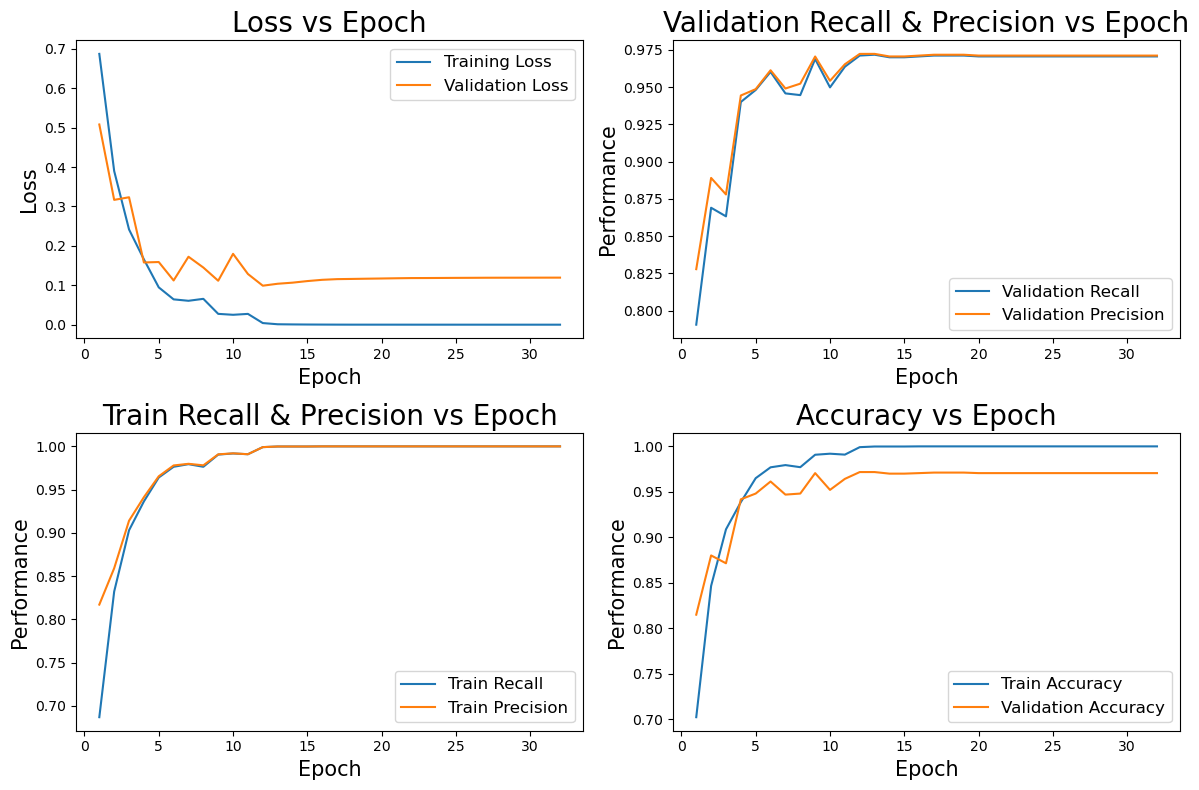

 3/54 [>.............................] - ETA: 1s - loss: 0.0012 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 2s 29ms/step - loss: 0.0990 - precision: 0.9723 - recall: 0.9712 - accuracy: 0.9717


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.001381,99.985605,99.985605,99.985605
1,Test,0.999695,91.197181,91.143698,91.143698
2,Validation,0.099029,97.228640,97.116494,97.174162


In [14]:
from functions import train_model, model_evaluate, view_history

# Train model
conv['Version4'] = train_model(cnn4, train_gen, val_gen, 50)

# View history 
view_history(conv, 'Version4')

# Evalaute model
model_evaluate(cnn4, train_gen, test_gen, val_gen)

We are getting close to overfitting. We do see that we have some noise in the training curve now and that is also reflected in the validation curve. Just to make sure we cant add more lets make a model with one more layer of concolutional and dense.

**Next Steps**: increase model depth/complexity

# CNN Version 5

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.regularizers import l2

# Define input shape
input_shape = (128, 128, 3)

# Define the basic model 
cnn5 = Sequential()

# Define the layers 
# Flatten layer to reshape the output
cnn5.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', input_shape=input_shape))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn5.add(MaxPool2D(pool_size=(2,2)))
cnn5.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn5.add(MaxPool2D(pool_size=(2,2)))

# Flatten Tensor
cnn5.add(Flatten())
cnn5.add(Dense(128, activation='relu'))
cnn5.add(Dense(128, activation='relu', kernel_regularizer=l2()))
cnn5.add(Dense(128, activation='relu'))
cnn5.add(Dense(128, activation='relu'))

# Define the output 
cnn5.add(Dense(4, activation='softmax'))

cnn5.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=metrics)
print(cnn5.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0

Epoch 1/50
218/218 [==============================] - 11s 38ms/step - loss: 1.2204 - precision: 0.7364 - recall: 0.5285 - accuracy: 0.6522 - val_loss: 0.6845 - val_precision: 0.8102 - val_recall: 0.7509 - val_accuracy: 0.7901 - lr: 0.0010
Epoch 2/50
218/218 [==============================] - 8s 37ms/step - loss: 0.6158 - precision: 0.8192 - recall: 0.7744 - accuracy: 0.7969 - val_loss: 0.5638 - val_precision: 0.8100 - val_recall: 0.7768 - val_accuracy: 0.7947 - lr: 0.0010
Epoch 3/50
218/218 [==============================] - 8s 36ms/step - loss: 0.4707 - precision: 0.8498 - recall: 0.8234 - accuracy: 0.8380 - val_loss: 0.3833 - val_precision: 0.8895 - val_recall: 0.8633 - val_accuracy: 0.8766 - lr: 0.0010
Epoch 4/50
218/218 [==============================] - 8s 37ms/step - loss: 0.3237 - precision: 0.9033 - recall: 0.8919 - accuracy: 0.8994 - val_loss: 0.3172 - val_precision: 0.9126 - val_recall: 0.9031 - val_accuracy: 0.9100 - lr: 0.0010
Epoch 5/50
218/218 [===========================

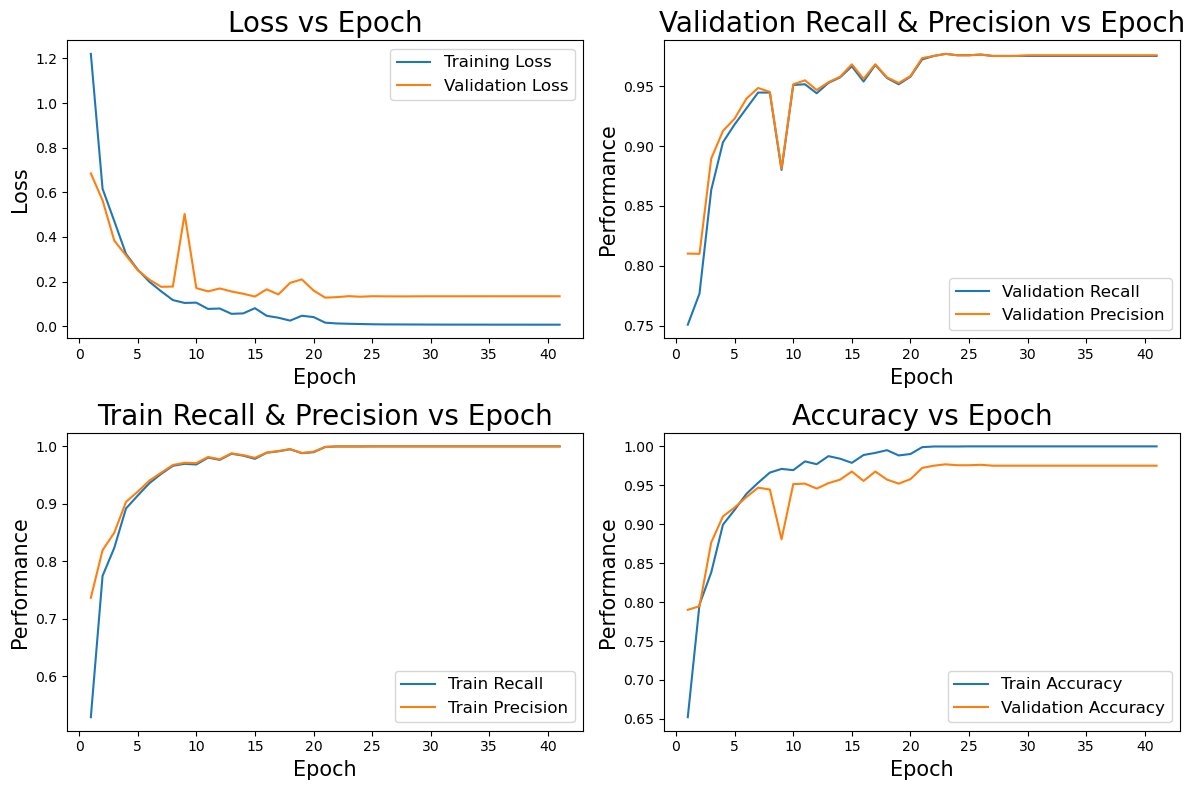

 3/54 [>.............................] - ETA: 1s - loss: 0.0114 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 2s 29ms/step - loss: 0.1275 - precision: 0.9734 - recall: 0.9723 - accuracy: 0.9723


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.012328,99.971205,99.971205,99.971205
1,Test,0.720142,91.436952,91.436952,91.436952
2,Validation,0.127502,97.344112,97.231835,97.231835


In [9]:
from functions import train_model, model_evaluate, view_history
conv = {}
# Train model
conv['Version5'] = train_model(cnn5, train_gen, val_gen, 50)

# View history 
view_history(conv, 'Version5')

# Evalaute model
model_evaluate(cnn5, train_gen, test_gen, val_gen)

The model is performing even better. We should add more regularization now as the noise on the training curve and validation curve is now showing. 

**Next Steps**: Add regularization

# CNN Version 6

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.regularizers import l2

# Define input shape
input_shape = (128, 128, 3)

# Define the basic model 
cnn6 = Sequential()

# Define the layers 
# Flatten layer to reshape the output
cnn6.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', input_shape=input_shape))
cnn6.add(MaxPool2D(pool_size=(2,2)))
cnn6.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn6.add(MaxPool2D(pool_size=(2,2)))
cnn6.add(Dropout(.20)) # regularization
cnn6.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn6.add(MaxPool2D(pool_size=(2,2)))
cnn6.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn6.add(MaxPool2D(pool_size=(2,2)))
cnn6.add(Dropout(.20)) # regularization

# Flatten Tensor
cnn6.add(Flatten())
cnn6.add(Dense(128, activation='relu'))
cnn6.add(Dense(128, activation='relu', kernel_regularizer=l2()))
cnn6.add(Dense(128, activation='relu'))
cnn6.add(Dense(128, activation='relu'))

# Define the output 
cnn6.add(Dense(4, activation='softmax'))

cnn6.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=metrics)
print(cnn6.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)       

Epoch 1/50
218/218 [==============================] - 9s 39ms/step - loss: 1.2959 - precision: 0.7903 - recall: 0.5791 - accuracy: 0.6274 - val_loss: 0.7991 - val_precision: 0.7372 - val_recall: 0.6551 - val_accuracy: 0.7128 - lr: 0.0010
Epoch 2/50
218/218 [==============================] - 8s 37ms/step - loss: 0.6704 - precision: 0.7986 - recall: 0.7375 - accuracy: 0.7725 - val_loss: 0.4961 - val_precision: 0.8777 - val_recall: 0.8235 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 3/50
218/218 [==============================] - 8s 37ms/step - loss: 0.4945 - precision: 0.8509 - recall: 0.8176 - accuracy: 0.8365 - val_loss: 0.3912 - val_precision: 0.8892 - val_recall: 0.8749 - val_accuracy: 0.8852 - lr: 0.0010
Epoch 4/50
218/218 [==============================] - 8s 37ms/step - loss: 0.4125 - precision: 0.8686 - recall: 0.8460 - accuracy: 0.8575 - val_loss: 0.3157 - val_precision: 0.8995 - val_recall: 0.8881 - val_accuracy: 0.8933 - lr: 0.0010
Epoch 5/50
218/218 [============================

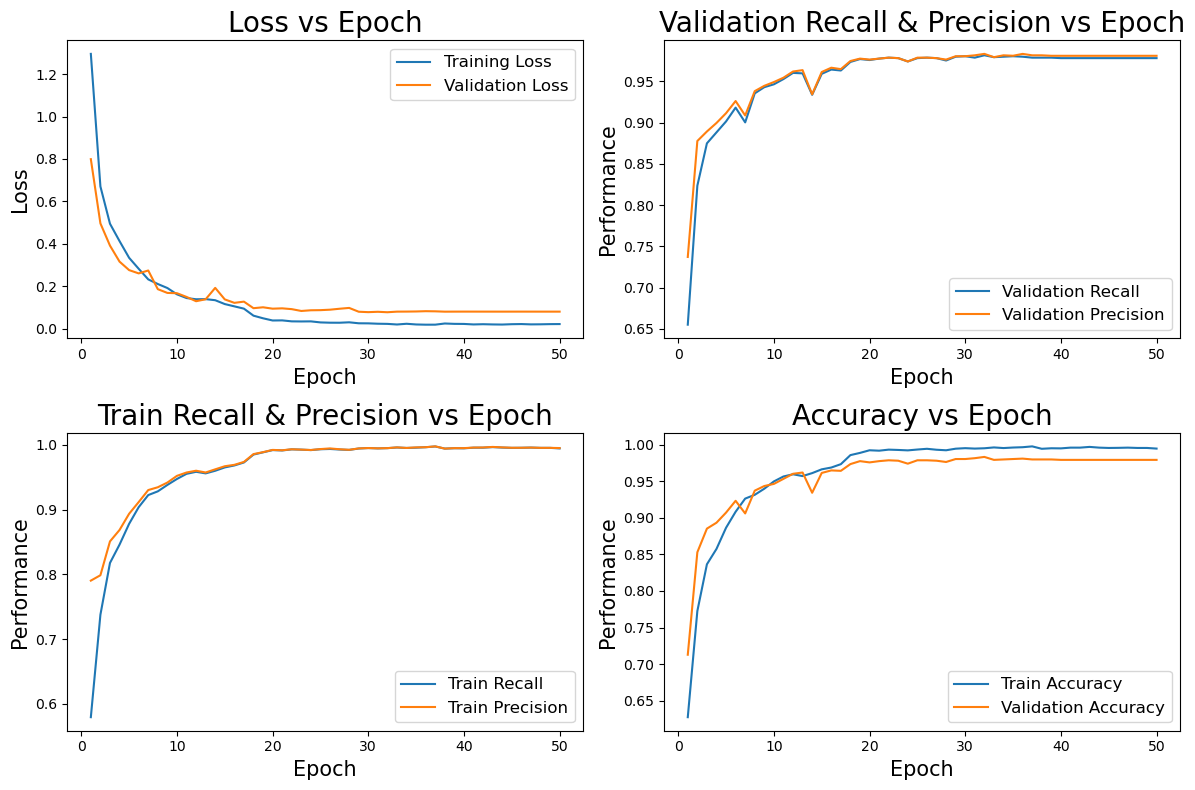

 3/54 [>.............................] - ETA: 1s - loss: 0.0140 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 2s 29ms/step - loss: 0.0773 - precision: 0.9804 - recall: 0.9804 - accuracy: 0.9804


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.010888,99.985605,99.985605,99.985605
1,Test,0.799056,92.366409,92.258066,92.316717
2,Validation,0.077320,98.039216,98.039216,98.039216


In [11]:
from functions import train_model, model_evaluate, view_history

# Train model
conv['Version6'] = train_model(cnn6, train_gen, val_gen, 50)

# View history 
view_history(conv, 'Version6')

# Evalaute model
model_evaluate(cnn6, train_gen, test_gen, val_gen)

Adding regularization helped get rid of some of the noise in the model. It seems that we still have some noise occuring. We need to increase the regularization in order to fix this issue

**Next Steps:** Increase regularitization

# CNN Version 7

In [10]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.regularizers import l2

# Define input shape
input_shape = (128, 128, 3)

# Define the basic model 
cnn7 = Sequential()

# Define the layers 
cnn7.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', input_shape=input_shape))
cnn7.add(MaxPool2D(pool_size=(2,2)))
cnn7.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn7.add(MaxPool2D(pool_size=(2,2)))

# Regularization
cnn7.add(Dropout(.40))

cnn7.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn7.add(MaxPool2D(pool_size=(2,2)))
cnn7.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))

# Regularization
cnn7.add(Dropout(.40))

# Flatten Tensor
cnn7.add(Flatten())
cnn7.add(Dense(128, activation='relu'))
cnn7.add(Dense(128, activation='relu', kernel_regularizer=l2()))
cnn7.add(Dense(128, activation='relu'))
cnn7.add(Dense(128, activation='relu'))

# Define the output 
cnn7.add(Dense(4, activation='softmax'))

cnn7.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=metrics)
print(cnn7.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2

Epoch 1/50
218/218 [==============================] - 21s 59ms/step - loss: 1.2053 - precision: 0.7397 - recall: 0.5276 - accuracy: 0.6454 - val_loss: 0.6791 - val_precision: 0.8241 - val_recall: 0.7405 - val_accuracy: 0.7860 - lr: 0.0010
Epoch 2/50
218/218 [==============================] - 8s 37ms/step - loss: 0.6403 - precision: 0.8107 - recall: 0.7518 - accuracy: 0.7861 - val_loss: 0.6107 - val_precision: 0.7945 - val_recall: 0.7468 - val_accuracy: 0.7722 - lr: 0.0010
Epoch 3/50
218/218 [==============================] - 8s 37ms/step - loss: 0.5002 - precision: 0.8404 - recall: 0.8051 - accuracy: 0.8259 - val_loss: 0.4150 - val_precision: 0.8816 - val_recall: 0.8501 - val_accuracy: 0.8662 - lr: 0.0010
Epoch 4/50
218/218 [==============================] - 8s 37ms/step - loss: 0.4061 - precision: 0.8623 - recall: 0.8426 - accuracy: 0.8514 - val_loss: 0.4490 - val_precision: 0.8156 - val_recall: 0.8010 - val_accuracy: 0.8091 - lr: 0.0010
Epoch 5/50
218/218 [===========================

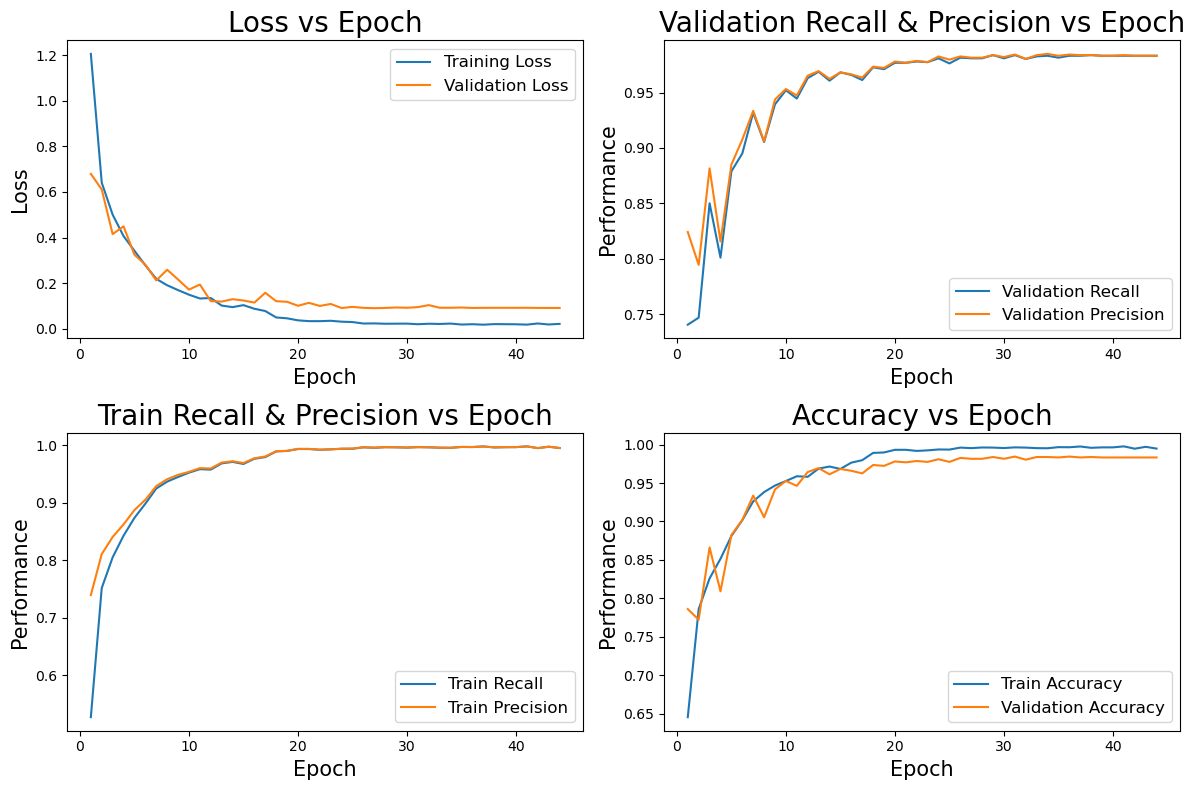

 3/54 [>.............................] - ETA: 2s - loss: 0.0118 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 2s 29ms/step - loss: 0.0909 - precision: 0.9827 - recall: 0.9810 - accuracy: 0.9810


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.013354,99.942410,99.942410,99.942410
1,Test,0.727941,92.018777,91.964811,91.964811
2,Validation,0.090854,98.266900,98.096883,98.096883


In [11]:
from functions import train_model, model_evaluate, view_history

# Train model
conv['Version7'] = train_model(cnn7, train_gen, val_gen, 50)

# View history 
view_history(conv, 'Version7')

# Evalaute model
model_evaluate(cnn7, train_gen, test_gen, val_gen)

It seems we actually did worse. We lost to much vital information. Instead lets regress back to .2 and increase l2 regularization so we work with more infromation but its penalized later on in the architecture.

**Next Steps:** Increase l2 regularization

# CNN Version 8

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.regularizers import l2

# Define input shape
input_shape = (128, 128, 3)

# Define the basic model 
cnn8 = Sequential()

# Define the layers 
# Flatten layer to reshape the output
cnn8.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same', input_shape=input_shape))
cnn8.add(MaxPool2D(pool_size=(2,2)))
cnn8.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn8.add(MaxPool2D(pool_size=(2,2)))

# Regularization
cnn8.add(Dropout(.20))

cnn8.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn8.add(MaxPool2D(pool_size=(2,2)))
cnn8.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', strides=(1,1), padding='same'))
cnn8.add(MaxPool2D(pool_size=(2,2)))

# Regularization
cnn8.add(Dropout(.20))

# Flatten Tensor
cnn8.add(Flatten())
cnn8.add(Dense(128, activation='relu'))
cnn8.add(Dense(128, activation='relu', kernel_regularizer=l2(0.1)))
cnn8.add(Dense(128, activation='relu'))
cnn8.add(Dense(128, activation='relu'))

# Define the output 
cnn8.add(Dense(4, activation='softmax'))

cnn8.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=metrics)
print(cnn8.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)       

Epoch 1/50
218/218 [==============================] - 9s 38ms/step - loss: 3.7145 - precision: 0.7880 - recall: 0.5665 - accuracy: 0.6107 - val_loss: 0.7515 - val_precision: 0.8159 - val_recall: 0.7082 - val_accuracy: 0.7757 - lr: 0.0010
Epoch 2/50
218/218 [==============================] - 8s 37ms/step - loss: 0.6761 - precision: 0.7659 - recall: 0.6897 - accuracy: 0.7380 - val_loss: 0.5559 - val_precision: 0.8073 - val_recall: 0.7537 - val_accuracy: 0.7901 - lr: 0.0010
Epoch 3/50
218/218 [==============================] - 8s 37ms/step - loss: 0.5293 - precision: 0.8183 - recall: 0.7734 - accuracy: 0.7966 - val_loss: 0.4343 - val_precision: 0.8517 - val_recall: 0.8316 - val_accuracy: 0.8408 - lr: 0.0010
Epoch 4/50
218/218 [==============================] - 8s 37ms/step - loss: 0.4442 - precision: 0.8495 - recall: 0.8234 - accuracy: 0.8372 - val_loss: 0.5796 - val_precision: 0.7825 - val_recall: 0.7572 - val_accuracy: 0.7699 - lr: 0.0010
Epoch 5/50
218/218 [============================

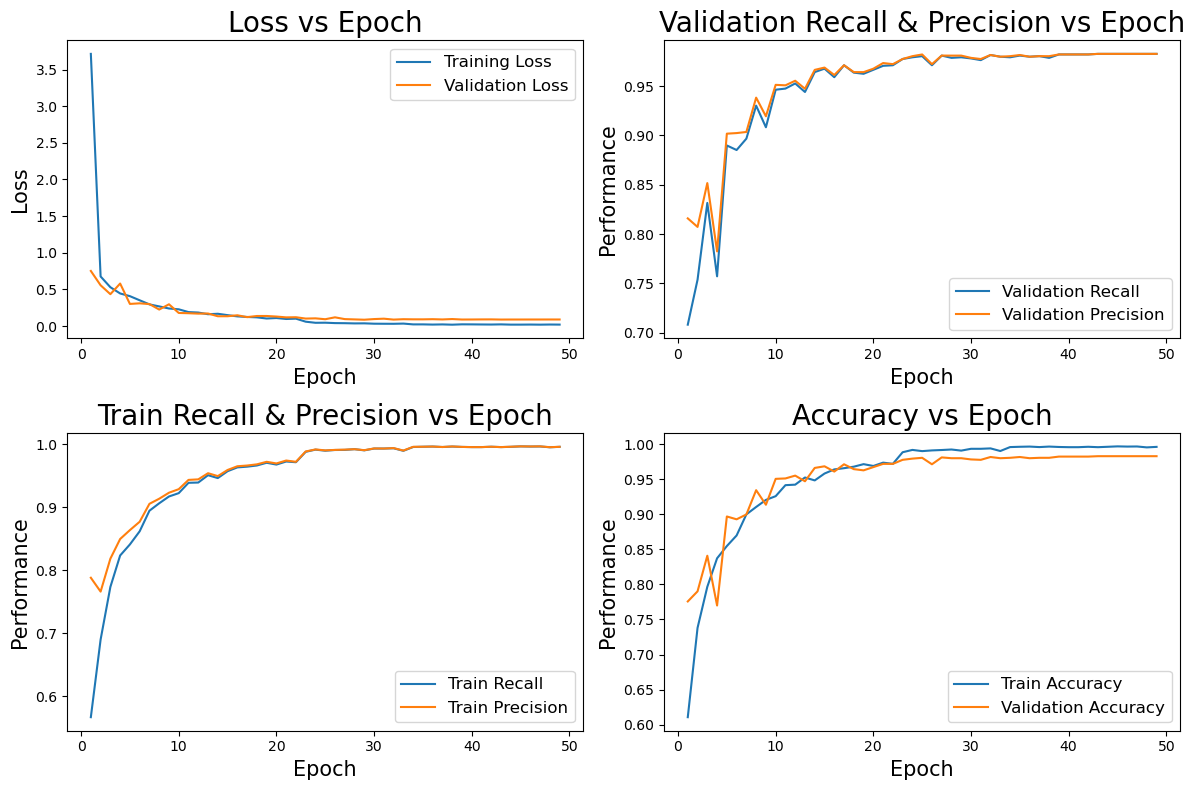

 3/54 [>.............................] - ETA: 1s - loss: 0.0177 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 2s 30ms/step - loss: 0.0857 - precision: 0.9809 - recall: 0.9792 - accuracy: 0.9798


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.015333,99.928015,99.928015,99.928015
1,Test,0.739216,91.495603,91.495603,91.495603
2,Validation,0.085733,98.093587,97.923875,97.981548


In [13]:
from functions import train_model, model_evaluate, view_history

# Train model
conv['Version8'] = train_model(cnn8, train_gen, val_gen, 50)

# View history 
view_history(conv, 'Version8')

# Evalaute model
model_evaluate(cnn8, train_gen, test_gen, val_gen)

This seems to be our best version so far. The reason its the best is because its the only version to get below .09 loss suggesting the validation loss and train loss are closer together now. It seems that this framework is working well. The next step would be to do a parameter search to find the best parameters. 

**Next Steps**: Use Keras Tuner

# Hyper parameter tuning

Hyper parameter tuning will allow us to squeeze the most performance we can using the framework/architecture we have so far. It is similar to a Gridsearch except, depending on the search type it can do it exhautvbely, randomly, or with learning. IN this case we us Hyperband param search which is a type of random search that considers the most promsing iterations and continue to narrow down considering the target which will be 'validation loss'. 

In other words the parameterr search will find the most promising parameter that will give us the lowest validation loss.

In [9]:
import keras_tuner
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
from keras.losses import CategoricalCrossentropy
from functions import get_callbacks
from keras.regularizers import l2
from keras.metrics import Precision, Recall
import os

# Create model framework
hp = keras_tuner.HyperParameters()
input_shape = (128, 128, 3)
metrics = [
        Precision(name='precision'),
        Recall(name='recall'),
        'accuracy'
    ]

def build_model1(hp=hp, input_shape=input_shape, metrics=metrics):
    # Instatiate model
    model = Sequential()
    
    # Make Convolutional network
    model.add(Conv2D(filters=hp.Int('filters_1', min_value=16, max_value=272, step=16),
                    kernel_size=hp.Choice('kernel_size_1', values=[1, 3, 5, 10]),
                    activation='relu',
                    padding=hp.Choice('padding_1', values=['valid', 'same']),
                    input_shape=input_shape))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=hp.Int('filters_2', min_value=16, max_value=272, step=16),
                    kernel_size=hp.Choice('kernel_size_2', values=[1, 3, 5, 10]),
                    activation='relu',
                    padding=hp.Choice('padding_2', values=['valid', 'same'])))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(hp.Float('droprate_1', min_value=0, max_value=.5, step=.1)))
    model.add(Conv2D(filters=hp.Int('filters_3', min_value=16, max_value=272, step=16),
                    kernel_size=hp.Choice('kernel_size_3', values=[1, 3, 5, 10]),
                    activation='relu',
                    padding=hp.Choice('padding_3', values=['valid', 'same'])))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=hp.Int('filters_4', min_value=16, max_value=272, step=16),
                    kernel_size=hp.Choice('kernel_size_4', values=[1, 3, 5, 10]),
                    activation='relu',
                    padding=hp.Choice('padding_4', values=['valid', 'same'])))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(hp.Float('droprate_2', min_value=0, max_value=.5, step=.1)))

    # Flatten Tensor and create Fully conected layers
    model.add(Flatten())
    model.add(Dense(units=hp.Int('units_1', min_value=1, max_value=256, step=31), 
                    activation='relu'))
    model.add(Dense(units=hp.Int('units_2', min_value=1, max_value=256, step=31), 
                    activation='relu',
                    kernel_regularizer=l2(hp.Float('regularization_factor', min_value=1e-6, max_value=1, sampling='log'))))
    model.add(Dense(units=hp.Int('units_4', min_value=1, max_value=256, step=31), 
                    activation='relu'))
    model.add(Dense(units=hp.Int('units_5', min_value=1, max_value=256, step=31), 
                    activation='relu'))
    
    # Create output layer
    model.add(Dense(units=4, activation='softmax'))
    
    # Define optimizer
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    
    # Compile model
    model.compile(optimizer=optimizer_choice,
                loss=CategoricalCrossentropy(),
                metrics=metrics)
    
    return model

# Create directory to save trail data 
tuner_directory = "trials/"

if not os.path.exists(tuner_directory):
    os.makedirs(tuner_directory)
    print(f"Directory '{tuner_directory}' created.")
else:
    print(f"Directory '{tuner_directory}' already exists.")

# Define the tuner/search strategy
tuner = keras_tuner.Hyperband(
    hypermodel=build_model1,
    objective='val_loss',
    max_epochs=60, # maximum number of epochs to train one model. Last model was 50 and converged but didnt overfit.
    directory=tuner_directory,
    project_name='my_hyperband_project1',
    seed=42
)

# Tuner.search uses same param as .fit()
# Run the hyperparameter search
tuner.search(train_gen, validation_data=val_gen, callbacks=get_callbacks())

# Retrieve the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the final model
best_model = tuner.hypermodel.build(best_hyperparameters)

Trial 90 Complete [00h 00m 00s]

Best val_loss So Far: 0.04924608767032623
Total elapsed time: 02h 47m 31s


In [10]:
# View the model
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 192)     5376      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 192)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 80)        138320    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 80)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 80)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 160)      

In [11]:
print(best_hyperparameters.values)

{'filters_1': 192, 'kernel_size_1': 3, 'padding_1': 'same', 'filters_2': 80, 'kernel_size_2': 3, 'padding_2': 'same', 'droprate_1': 0.2, 'filters_3': 160, 'kernel_size_3': 3, 'padding_3': 'valid', 'filters_4': 208, 'kernel_size_4': 3, 'padding_4': 'same', 'droprate_2': 0.1, 'units_1': 32, 'units_2': 249, 'regularization_factor': 7.939999486846715e-05, 'units_4': 249, 'units_5': 249, 'optimizer': 'adam', 'tuner/epochs': 60, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


Epoch 1/100
218/218 [==============================] - 9s 39ms/step - loss: 0.8452 - precision: 0.7048 - recall: 0.3707 - accuracy: 0.6068 - val_loss: 0.5988 - val_precision: 0.7654 - val_recall: 0.7001 - val_accuracy: 0.7445 - lr: 0.0010
Epoch 2/100
218/218 [==============================] - 8s 37ms/step - loss: 0.5159 - precision: 0.8057 - recall: 0.7545 - accuracy: 0.7842 - val_loss: 0.4382 - val_precision: 0.8233 - val_recall: 0.8085 - val_accuracy: 0.8195 - lr: 0.0010
Epoch 3/100
218/218 [==============================] - 8s 37ms/step - loss: 0.4022 - precision: 0.8519 - recall: 0.8259 - accuracy: 0.8395 - val_loss: 0.3373 - val_precision: 0.8829 - val_recall: 0.8610 - val_accuracy: 0.8749 - lr: 0.0010
Epoch 4/100
218/218 [==============================] - 8s 37ms/step - loss: 0.3016 - precision: 0.8893 - recall: 0.8746 - accuracy: 0.8825 - val_loss: 0.2206 - val_precision: 0.9188 - val_recall: 0.9135 - val_accuracy: 0.9164 - lr: 0.0010
Epoch 5/100
218/218 [=======================

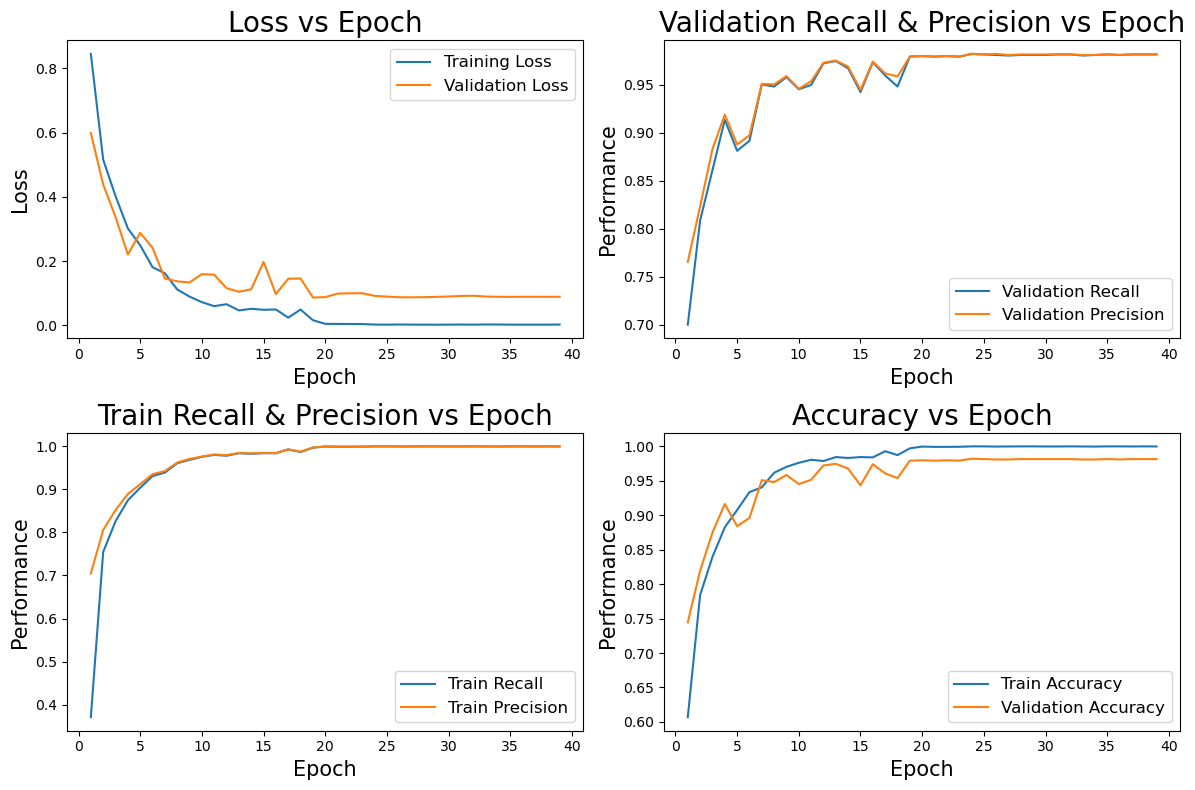

 1/54 [..............................] - ETA: 3s - loss: 0.0021 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 2s 29ms/step - loss: 0.0863 - precision: 0.9792 - recall: 0.9792 - accuracy: 0.9792


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.003325,100.000000,100.000000,100.000000
1,Test,0.727310,92.983490,92.492670,92.492670
2,Validation,0.086309,97.923875,97.923875,97.923875


In [12]:
from functions import train_model, view_history, model_evaluate

conv = {}

conv['param1'] = train_model(best_model, train_gen, val_gen, 100)

view_history(conv, 'param1')

model_evaluate(best_model, train_gen, test_gen, val_gen)

In [13]:
from keras.models import save_model

save_model(best_model, "models/op_model1.keras")

As we can see our train loss and val loss are much closer overall in this optimized version. This is a good thing as it allows for good generalization. We seem to perform about the same for testing images no matter what we do. We need to take this trained model and train it on augmented data. 

# Augmentation

In [14]:
from functions import data_augmentation
import os

# Define data folder
data_folder = "data/"

# Define train, val, test folders
train_folder = os.path.join(data_folder, "Training/")
test_folder = os.path.join(data_folder, "Testing/")
val_folder = os.path.join(data_folder, "Validation/")

# Define our data directories
train_data_dir = train_folder
test_data_dir = test_folder
val_data_dir = val_folder

# Obtain data generators
train_gen_aug, test_gen_aug, val_gen_aug = data_augmentation(128, 32, train_data_dir=train_data_dir, test_data_dir=test_data_dir, val_data_dir=val_data_dir)

Found 6946 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.
Found 1734 images belonging to 4 classes.


In [15]:
# Find out how the image data generators labeled our classes
train_class_labels = train_gen_aug.class_indices
val_class_labels = train_gen_aug.class_indices
test_class_labels = val_gen_aug.class_indices

# Print the class labels
print("Train Class Labels:", train_class_labels)
print("Validation Class Labels:", val_class_labels)
print("Test Class Labels:", test_class_labels)

Train Class Labels: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}
Validation Class Labels: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}
Test Class Labels: {'glioma': 0, 'meningioma': 1, 'no_tumor': 2, 'pituitary': 3}


Image dimensions: (128, 128, 3)


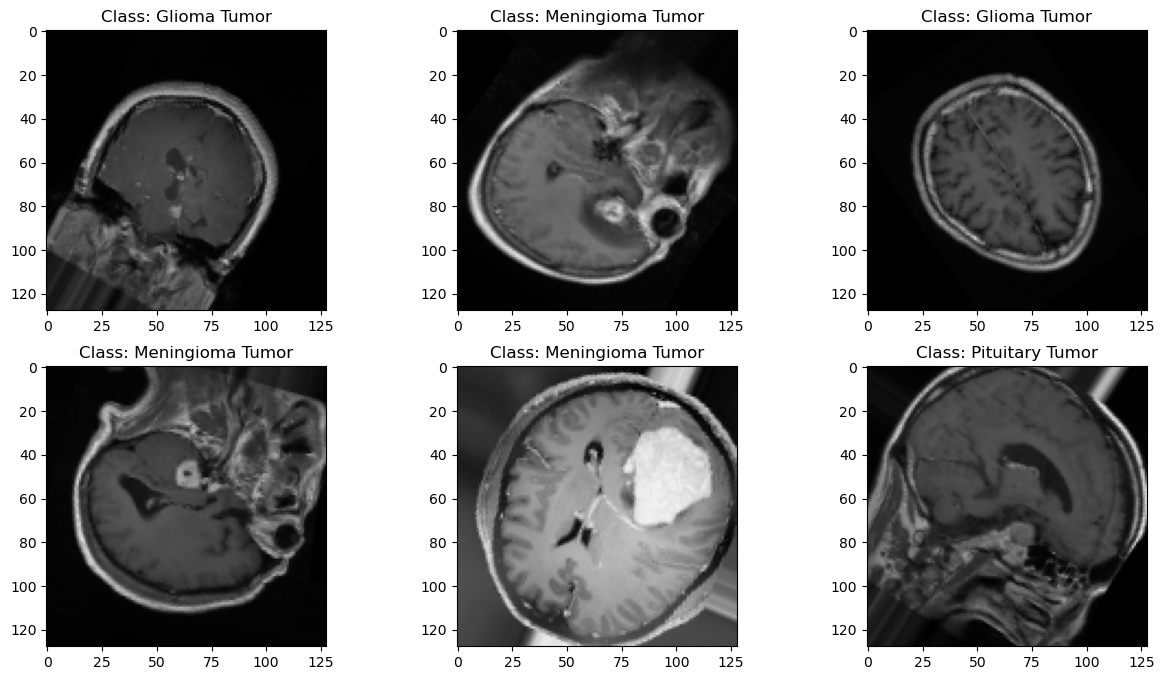

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve one batch of images from the generator
images, labels = train_gen_aug.next()

# Print the dimensions of the first image
print("Image dimensions:", images[0].shape)

# Define the class labels
class_labels = {'Glioma Tumor': 0, 'Meningioma Tumor': 1, 'No Tumor': 2, 'Pituitary Tumor': 3}

# Display the first six images with their labels
fig, ax = plt.subplots(2, 3, facecolor='white', figsize=(15, 8))

for i in range(2):
    for j in range(3):
        # Calculate the index in the images and labels arrays
        idx = i * 3 + j
        
        # Get the predicted class
        class_idx = np.argmax(labels[idx])
        
        # Get the class name from the label
        class_name = [key for key, value in class_labels.items() if value == class_idx][0]
        
        # Plot the image
        ax[i, j].imshow(images[idx])
        ax[i, j].set_title(f"Class: {class_name}")

plt.show()

Epoch 1/100
218/218 [==============================] - 27s 123ms/step - loss: 1.4426 - precision: 0.6940 - recall: 0.6720 - accuracy: 0.6818 - val_loss: 1.3465 - val_precision: 0.6979 - val_recall: 0.6782 - val_accuracy: 0.6920 - lr: 3.2000e-07
Epoch 2/100
218/218 [==============================] - 25s 117ms/step - loss: 1.3879 - precision: 0.6972 - recall: 0.6738 - accuracy: 0.6847 - val_loss: 1.3272 - val_precision: 0.6978 - val_recall: 0.6713 - val_accuracy: 0.6811 - lr: 3.2000e-07
Epoch 3/100
218/218 [==============================] - 25s 116ms/step - loss: 1.3836 - precision: 0.6975 - recall: 0.6728 - accuracy: 0.6849 - val_loss: 1.3098 - val_precision: 0.6996 - val_recall: 0.6730 - val_accuracy: 0.6897 - lr: 3.2000e-07
Epoch 4/100
218/218 [==============================] - 25s 115ms/step - loss: 1.3034 - precision: 0.7053 - recall: 0.6811 - accuracy: 0.6916 - val_loss: 1.2251 - val_precision: 0.7138 - val_recall: 0.6874 - val_accuracy: 0.6995 - lr: 3.2000e-07
Epoch 5/100
218/218 

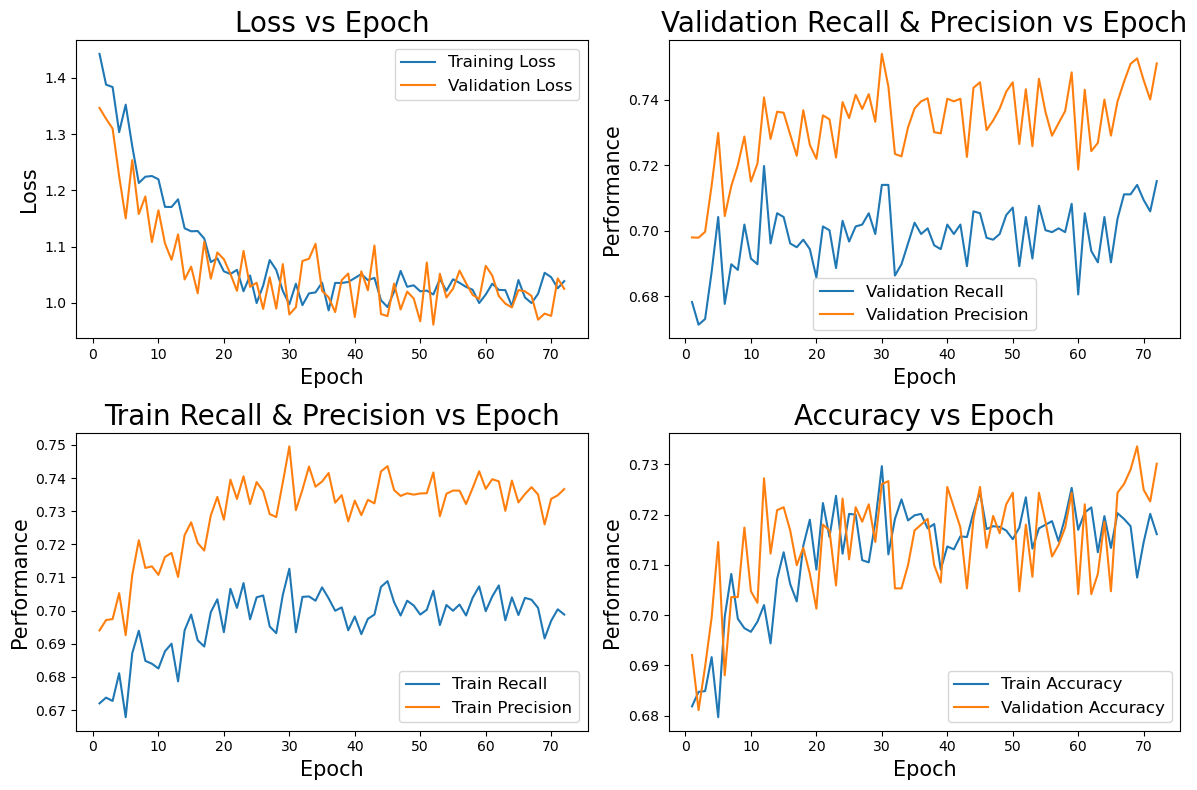

 3/54 [>.............................] - ETA: 1s - loss: 0.0039 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 5s 94ms/step - loss: 1.0315 - precision: 0.7283 - recall: 0.6972 - accuracy: 0.7116


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.952348,74.871564,71.336019,72.991651
1,Test,0.583753,93.140155,92.375368,92.375368
2,Validation,1.031523,72.831327,69.723183,71.164936


In [17]:
from keras.models import load_model
from functions import train_model, model_evaluate, view_history

# Load the model 
model1 = load_model("models/op_model1.keras")

# Apply data augmentation on saved model
aug = {}

# Train the model and save history
aug["Version1"] = train_model(model1, train_generator=train_gen_aug, val_gen=val_gen_aug, total_epochs=100)

# View the History
view_history(aug, "Version1")

# Evaluate model
model_evaluate(model1, train_gen=train_gen_aug, test_gen=test_gen_aug, val_gen=val_gen_aug)

In [18]:
from functions import model_evaluate, process_data

train_gen, test_gen, val_gen = process_data(128, 32, train_data_dir=train_data_dir, test_data_dir=test_data_dir, val_data_dir=val_data_dir)

# Evaluate model on original data
model_evaluate(model1, train_gen=train_gen, test_gen=test_gen, val_gen=val_gen)

Found 6946 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.
Found 1734 images belonging to 4 classes.
 3/54 [>.............................] - ETA: 1s - loss: 0.0039 - precision: 1.0000 - recall: 1.0000 - accuracy: 1.0000

c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 2s 30ms/step - loss: 0.0815 - precision: 0.9798 - recall: 0.9792 - accuracy: 0.9792


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.006728,99.971199,99.942410,99.971205
1,Test,0.583753,93.140155,92.375368,92.375368
2,Validation,0.081486,97.980380,97.923875,97.923875


In [19]:
from keras.models import save_model

#save_model(model1, "models/op_model1_aug.keras")

It seems that we did learn a bit more with augmented data. It was not a huge performance increase but now we generalize slightly better since we had more data. We can tell we generalized better because ouy val_loss and train loss are closer to eachother and so are the metrics. Lets view a confusion matrix on the test set. 

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np 

# Load our model 
model1 = load_model("models/op_model1_aug.keras")

# Get the number of samples in the test set
num_samples = len(test_gen)

# Initialize empty arrays to collect true labels
true_labels_all = []
predicted_labels_all = []

# Iterate over all batches in the test set
for i in range(num_samples):
    # Generate the next batch
    images, labels = test_gen.next()
    
    # Get true labels (assuming labels are one-hot encoded)
    true_labels = np.argmax(labels, axis=1)
    
    # Get predictions and labels from test set
    predictions = model1.predict(images)

    # Get the predicted labels
    predicted_labels = predictions.argmax(axis=1)
    
    # Append true and predicted labels to the lists
    true_labels_all.extend(true_labels)
    predicted_labels_all.extend(predicted_labels)


# Convert lists to numpy arrays for confusion matrix calculation
true_labels_all = np.array(true_labels_all)
predicted_labels_all = np.array(predicted_labels_all)

1/1 [==============================] - 0s 14ms/step


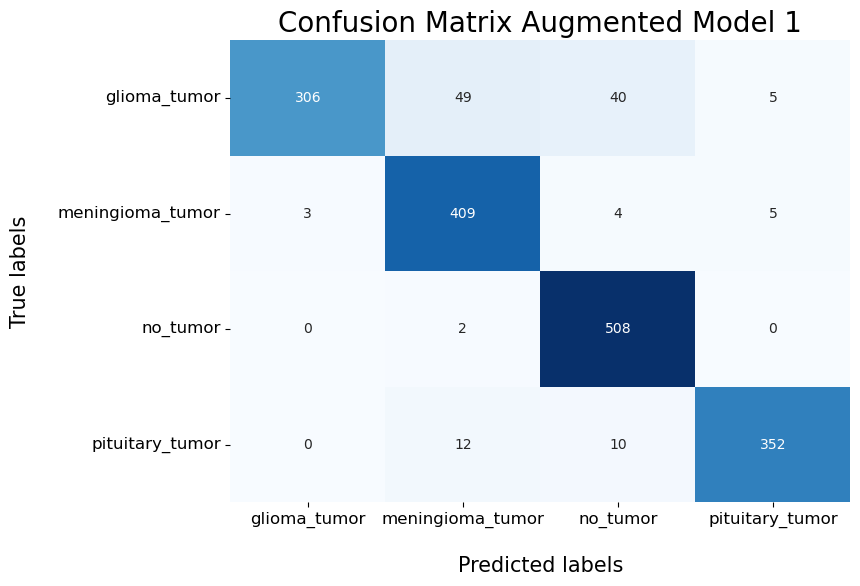

In [31]:
import seaborn as sns

# Create confusion matrix
conf_matrix = confusion_matrix(y_true=true_labels_all, y_pred=predicted_labels_all)

# Visualize confusion matrix 
title = 20
label = 15
ticks = 12

plt.figure(figsize=(8, 6), facecolor='white')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"], 
            yticklabels=["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"], 
            annot_kws={"fontsize": 10}, 
            cbar=False)
plt.xlabel('Predicted labels', labelpad=20, fontsize=label)
plt.xticks(fontsize=ticks)
plt.ylabel('True labels', labelpad=20, fontsize=label)
plt.yticks(fontsize=ticks)
plt.title('Confusion Matrix Augmented Model 1', fontsize=title)
plt.show()

In [12]:
from functions import process_data
import os
### Lets view an image explainer to see how the models are evealuated

# Define data folder
data_folder = "data/"

# Define train, val, test folders
train_folder = os.path.join(data_folder, "Training/")
test_folder = os.path.join(data_folder, "Testing/")
val_folder = os.path.join(data_folder, "Validation/")

# Define our data directories
train_data_dir = train_folder
test_data_dir = test_folder
val_data_dir = val_folder

# Lets retrieve a batch of images to explain
train_gen, test_gen, val_gen = process_data(128, 32, train_data_dir=train_data_dir, test_data_dir=test_data_dir, val_data_dir=val_data_dir)
image_batch, label_batch = test_gen.next()

Found 6946 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.
Found 1734 images belonging to 4 classes.


## View what the model learned

Before we use Lime to explain instances we need to preprocess the data in a way LIME can easily use the images. Generators can be tricky with lime so instead we will have to manually preprocess the data. 

Adding on, we also have to define some functions so LIME can use in the image explainer. 

In [2]:
from PIL import Image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import numpy as np

# Preprocess data into array 
def preprocess_image(image_path, target_size=(128, 128)):
    # Open Image
    img = Image.open(image_path)
    # Resize image 
    img = img.resize(target_size)
    # Convert to RGB
    img_rgb = img.convert('RGB')
    # Convert to array and normalize
    img_array = np.array(img_rgb) / 255.0
    return img_array

# Function to predict using deep learning model
def predict_fn(model_path, images):
    model = load_model(model_path)
    return model.predict(images)

# Function to display explanations using Matplotlib
def display_explanation(mask, image):
    from skimage.segmentation import mark_boundaries
    import matplotlib.pyplot as plt
    
    plt.imshow(mark_boundaries(image, mask))
    plt.show()

In [6]:
from lime import lime_image
from keras.models import load_model
import os
from sklearn.model_selection import train_test_split

# Load our model 
model = load_model("models/op_model1_aug.keras")

# Define image explainer 
explainer = lime_image.LimeImageExplainer(random_state=42)

# List image files for every class 
train_folder = "data/training/"

class_0 = [os.path.join(train_folder, "glioma", file) for file in os.listdir(os.path.join(train_folder, "glioma")) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
class_1 = [os.path.join(train_folder, "meningioma", file) for file in os.listdir(os.path.join(train_folder, "meningioma")) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
class_2 = [os.path.join(train_folder, "no_tumor", file) for file in os.listdir(os.path.join(train_folder, "no_tumor")) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]
class_3 = [os.path.join(train_folder, "pituitary", file) for file in os.listdir(os.path.join(train_folder, "pituitary")) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Preprocess images for every class
glioma = [preprocess_image(path) for path in class_0]
meningioma = [preprocess_image(path) for path in class_1]
no_tumor = [preprocess_image(path) for path in class_2]
pituitary = [preprocess_image(path) for path in class_3]

# Create labels for every class 
labels_glioma = np.zeros(len(glioma))
labels_meningioma = np.ones(len(meningioma))
labels_no_tumor = 2 * np.ones(len(no_tumor))
labels_pituitary = 3 * np.ones(len(pituitary))

# Combine all images and labels 
all_images = np.vstack([glioma, meningioma, no_tumor, pituitary])
all_labels = np.concatenate([labels_glioma, labels_meningioma, labels_no_tumor, labels_pituitary])

# Split data into training and test sets to fit the lime explainer 
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 17ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 15ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 13ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 16ms/step


  0%|          | 0/2000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 14ms/step


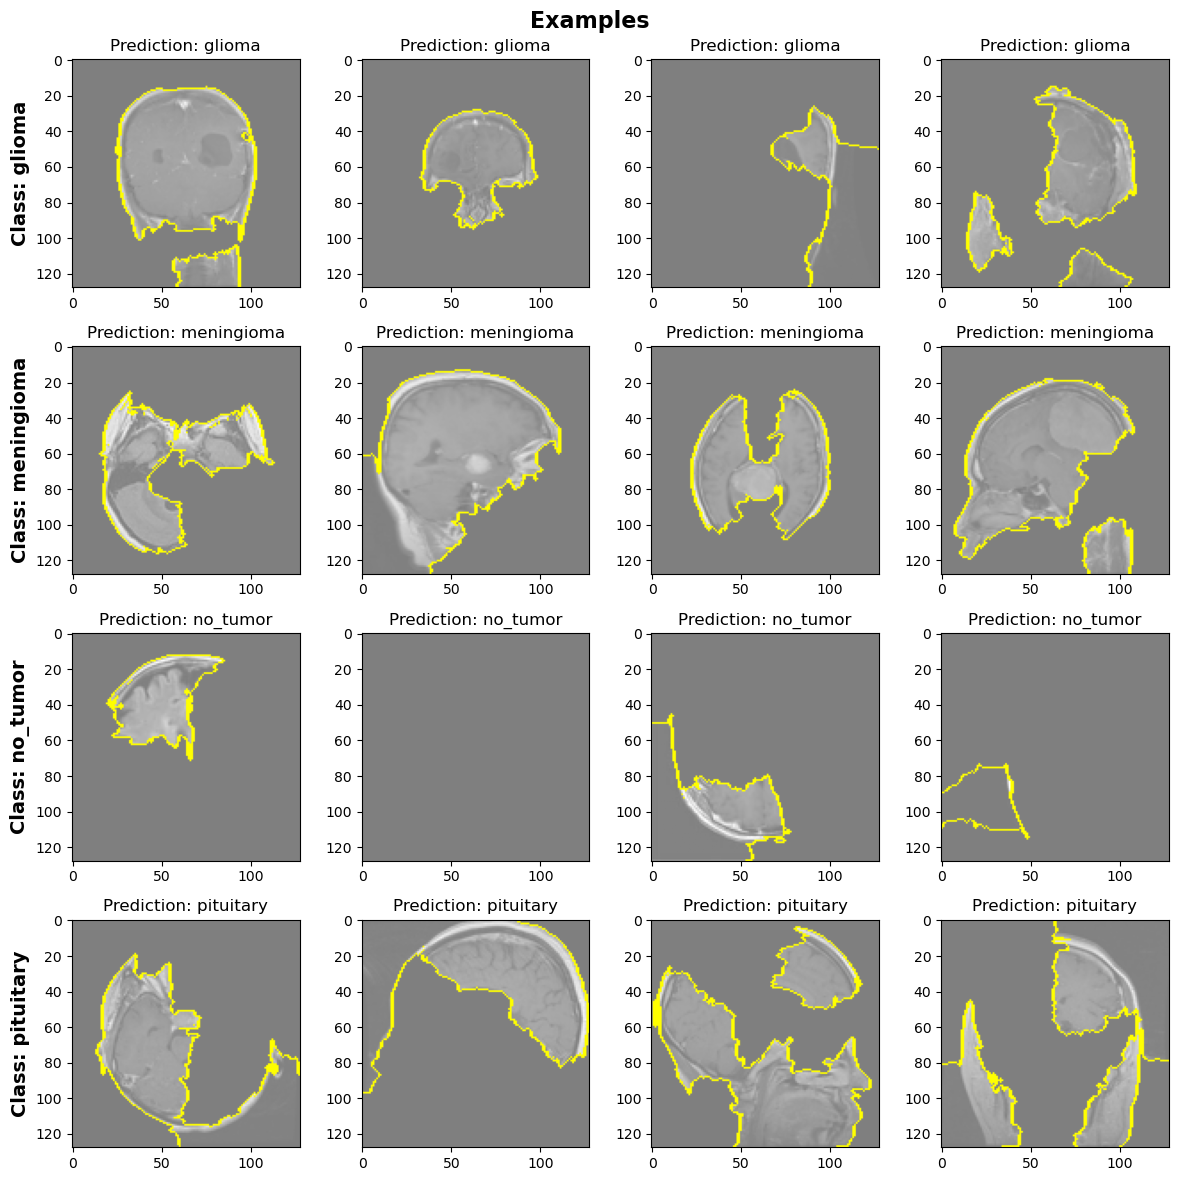

In [23]:
import matplotlib.pyplot as plt

# Select 4 instances of each class for explanation
instances_per_class = 4
instances_to_explain = []
for i in range(4):
    instances_to_explain.extend(np.where(y_test == i)[0][:instances_per_class])

# Create a single figure with multiple subplots
fig, axes = plt.subplots(4, instances_per_class, figsize=(12, 12))

# Iterate over instances to explain and generate explanations
for i, instance_idx in enumerate(instances_to_explain):
    # Get image and label
    image = X_test[instance_idx]
    label = y_test[instance_idx]
    
    # Develop local model explanation
    explanation = explainer.explain_instance(
        image=image,
        classifier_fn=model.predict,
        top_labels=4,
        num_samples=2000,
        hide_color=0,
        random_seed=42
    )
    
    # Get the class name
    class_name = ['glioma', 'meningioma', 'no_tumor', 'pituitary'][int(label)]
    prediction = model.predict(image.reshape(1, 128, 128, 3))
    predicted_class = np.argmax(prediction)  # Get the index of the highest probability
    predicted_class_name = ['glioma', 'meningioma', 'no_tumor', 'pituitary'][predicted_class]
    
    # Display the explanation on a subplot
    ax = axes[int(label), i % instances_per_class]
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],  # Using the top predicted label for visualization
        positive_only=True,
        num_features=5, 
        hide_rest=True, 
        min_weight=0.1
    )
    ax.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    ax.set_title(f'Prediction: {predicted_class_name}')
    
    # Add superior title for each row indicating the class name
    if i % instances_per_class == 0:
        ax_row = axes[int(label), i % instances_per_class]
        ax_row.set_ylabel(f'Class: {class_name}', loc='center', fontsize=14, fontweight='bold')

# Adjust layout and show the figure
fig.suptitle('Examples', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Transfer Learning with InceptionV3

Transfer Learning can be very effective because it takes advantage of pre-trained models. These pre-trained models have been trained on thousands of images when using the imagenet weights. They are used for general application as you can classify anthing with them. Because they are trained on so many images and topic it may take very long to fine tune a model if you do not have good hardware. 

In this repo we will attempt to fine tune a model because we are using an NVIDIA graphics processing unit. 

In [6]:
from functions import process_data
import os

# We need to makle new image data generators since pre-trained models may require different image dimensions. 
# We will be using InceptionV3

# Define data folder
data_folder = "data/"

# Define train, val, test folders
train_folder = os.path.join(data_folder, "Training/")
test_folder = os.path.join(data_folder, "Testing/")
val_folder = os.path.join(data_folder, "Validation/")

# Define our data directories
train_data_dir = train_folder
test_data_dir = test_folder
val_data_dir = val_folder

# Create data generators for transfer learning. Inception V3 uses (299,299,3)
train_gen_t, test_gen_t, val_gen_t = process_data(img_dims=299, batch_size=32, train_data_dir=train_data_dir, test_data_dir=test_data_dir, val_data_dir=val_data_dir)

Found 6946 images belonging to 4 classes.
Found 1705 images belonging to 4 classes.
Found 1734 images belonging to 4 classes.


In [20]:
batch_images, batch_labels = next(train_gen_t)

# Print the shape of the batch
print("Shape of batch images:", batch_images.shape)
print("Shape of batch labels:", batch_labels.shape)


Shape of batch images: (32, 299, 299, 3)
Shape of batch labels: (32, 4)


## Base Inception

In [31]:
from keras.applications import InceptionV3
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy
from keras.metrics import Precision, Recall
from functions import get_callbacks

# Define metrics we want to log for the compile method callback
metrics = [
        Precision(name='precision'),
        Recall(name='recall'),
        'accuracy'
    ]

# Define Inception model
inception_base = InceptionV3(include_top=False, weights='imagenet', input_shape=(299,299,3))

# Freeze the convolutional layers/Feature extractors
for layer in inception_base.layers:
    layer.trainable = False

# Add Inception layers to model
model_inception = Sequential()
model_inception.add(inception_base)

# Flatten Convolutional output
model_inception.add(Flatten())

# Define custom connected layers
model_inception.add(Dense(256,  activation='relu'))

# Define output layer 
model_inception.add(Dense(4, activation='softmax'))

# Complile the model
callbacks = get_callbacks()
model_inception.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=metrics)

# print summary
model_inception.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 131072)            0         
                                                                 
 dense_12 (Dense)            (None, 256)               33554688  
                                                                 
 dense_13 (Dense)            (None, 4)                 1028      
                                                                 
Total params: 55,358,500
Trainable params: 33,555,716
Non-trainable params: 21,802,784
_________________________________________________________________


Epoch 1/100
218/218 [==============================] - 24s 95ms/step - loss: 3.5066 - precision: 0.8418 - recall: 0.8388 - accuracy: 0.8401 - val_loss: 0.2861 - val_precision: 0.9081 - val_recall: 0.9060 - val_accuracy: 0.9072 - lr: 0.0010
Epoch 2/100
218/218 [==============================] - 16s 75ms/step - loss: 0.1118 - precision: 0.9608 - recall: 0.9597 - accuracy: 0.9600 - val_loss: 0.1551 - val_precision: 0.9498 - val_recall: 0.9493 - val_accuracy: 0.9493 - lr: 0.0010
Epoch 3/100
218/218 [==============================] - 16s 75ms/step - loss: 0.0604 - precision: 0.9795 - recall: 0.9787 - accuracy: 0.9793 - val_loss: 0.1181 - val_precision: 0.9682 - val_recall: 0.9666 - val_accuracy: 0.9683 - lr: 0.0010
Epoch 4/100
218/218 [==============================] - 16s 75ms/step - loss: 0.0229 - precision: 0.9921 - recall: 0.9921 - accuracy: 0.9921 - val_loss: 0.1031 - val_precision: 0.9648 - val_recall: 0.9637 - val_accuracy: 0.9648 - lr: 0.0010
Epoch 5/100
218/218 [===================

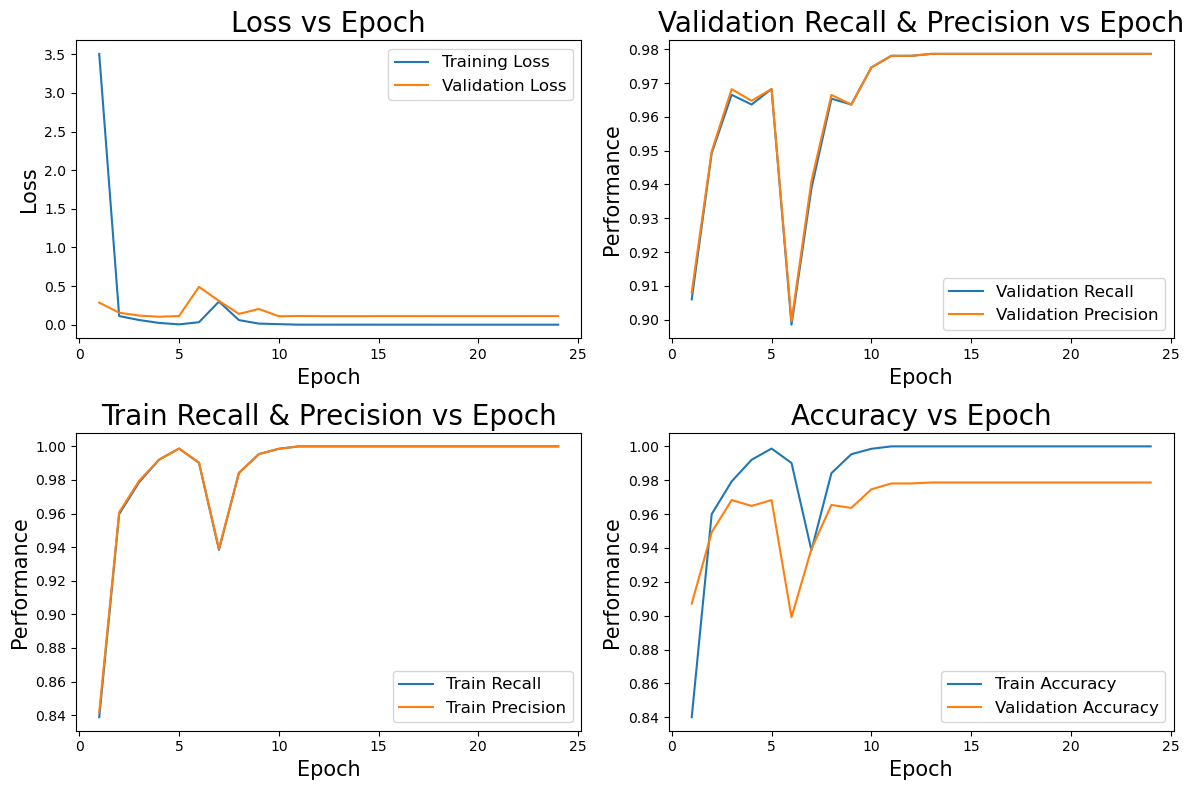

218/218 [==============================] - 13s 59ms/step - loss: 0.0093 - precision: 0.9967 - recall: 0.9967 - accuracy: 0.9967


c:\Users\delga\Documents\Phase5\brain_tumor_classification\functions.py:311: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([dict(zip(columns, train_metrics))])], ignore_index=True)


55/55 [==============================] - 3s 60ms/step - loss: 0.1031 - precision: 0.9648 - recall: 0.9637 - accuracy: 0.9648


,Set,Loss,Precision,Recall,Accuracy
0,Train,0.009338,99.668872,99.668872,99.668872
1,Test,0.671286,91.373241,91.319650,91.319650
2,Validation,0.103140,96.478063,96.366781,96.482122


In [32]:
from functions import train_model, model_evaluate, view_history

# Train model and save history
inception_dict = {}

inception_dict['Version1'] = train_model(model_inception, train_gen_t, val_gen_t, 100)

# View History
view_history(inception_dict, "Version1")

# Evaluate model
model_evaluate(model_inception, train_gen_t, test_gen_t, val_gen_t)

We are overfitting so we should probably dropout some convolutional information before flattening.

In [33]:
import numpy as np

# Make predictions to view performances


# Get the number of samples in the test set
num_samples = len(test_gen_t)

# Initialize empty arrays to collect true labels
true_labels_all = []
predicted_labels_all = []

# Iterate over all batches in the test set
for i in range(num_samples):
    # Generate the next batch
    images, labels = test_gen_t.next()
    
    # Get true labels (assuming labels are one-hot encoded)
    true_labels = np.argmax(labels, axis=1)
    
    # Get predictions and labels from test set
    predictions = model_inception.predict(images)

    # Get the predicted labels
    predicted_labels = predictions.argmax(axis=1)
    
    # Append true and predicted labels to the lists
    true_labels_all.extend(true_labels)
    predicted_labels_all.extend(predicted_labels)

# Convert lists to numpy arrays for confusion matrix calculation
true_labels_all = np.array(true_labels_all)
predicted_labels_all = np.array(predicted_labels_all)

1/1 [==============================] - 1s 750ms/step


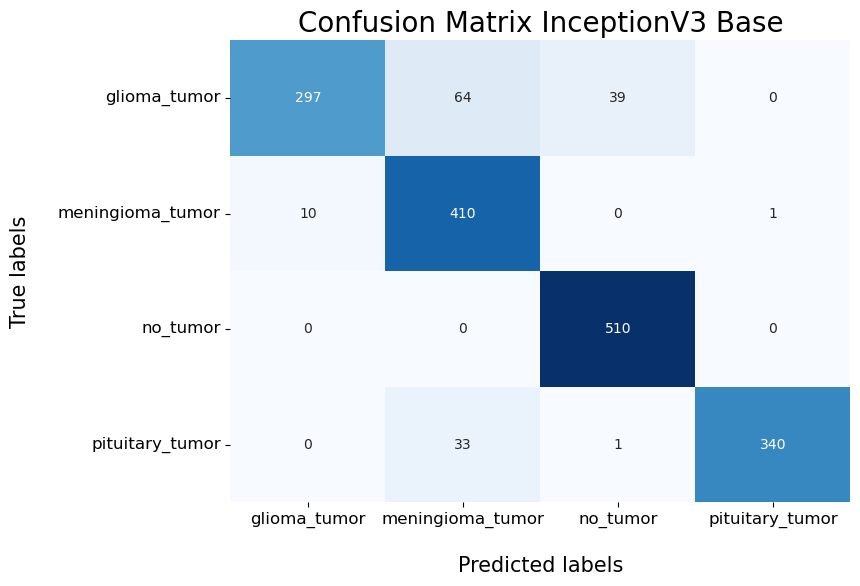

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix_inception = confusion_matrix(true_labels_all, predicted_labels_all)

# Visualize confusion matrix 
title = 20
label = 15
ticks = 12

plt.figure(figsize=(8, 6), facecolor='white')
sns.heatmap(conf_matrix_inception, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"], 
            yticklabels=["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"], 
            annot_kws={"fontsize": 10}, 
            cbar=False)
plt.xlabel('Predicted labels', labelpad=20, fontsize=label)
plt.xticks(fontsize=ticks)
plt.ylabel('True labels', labelpad=20, fontsize=label)
plt.yticks(fontsize=ticks)
plt.title('Confusion Matrix InceptionV3 Base', fontsize=title)
plt.show()